In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=3).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 3 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/3 [00:00<?, ?engine/s]

In [3]:
learning_rates = [0.1]

dfca_gi = []
ifca = []
dfca_li = []

In [4]:
%%px --targets all

import sys
import os
import random
sys.path.append(os.getcwd())

random.seed(42)
seeds = random.sample(range(10000), 5)
learning_rates = [0.1]

dfca_gi = []
dfca_li = []
ifca = []

Running the dfca-gi experiment

In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

In [6]:
%%px --target 1 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_li.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_li.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [7]:
%%px --target 2 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

## Results

DFCA-GI Experiment Outputs

In [8]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
dfca_li = rc[1].pull('dfca_li', block=True)
ifca = rc[2].pull('ifca', block=True)

unknown:   0%|          | 0/3 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.1, seed: 1824---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda:0
Epoch -1 tr: l 2.290 a 0.119 clct[np.int64(1523), np.int64(304), np.int64(365), np.int64(208)] cl_acc 0.338  17.903sec
Epoch -1 tst: l 2.289 a 0.116 clct[np.int64(267), np.int64(54), np.int64(50), np.int64(29)] cl_acc 0.312  3.397sec
Epoch 0 tr: l 2.195 a 0.273 clct[np.int64(1001), np.int64(586), np.int64(602), np.int64(211)] cl_acc 0.664  lr 0.100000 60.854sec(train) 25.224sec(infer)
Epoch 0 tst: l 2.194 a 0.273 clct[np.int64(165), np.int64(97), np.int64(93), np.int64(45)] cl_acc 0.652  3.093sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 1.975 a 0.521 clct[np.int64(601), np.int64(603

100%|██████████| 9.91M/9.91M [00:01<00:00, 9.69MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 286kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.18MB/s]


DFCA-LI Experiment Outputs

In [9]:
__.display_outputs()

---------------------------------DFCA-LI, lr: 0.1, seed: 1824---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'local_model_init': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_li'}
Using device: cuda:0
Epoch -1 tr: l 2.294 a 0.118 clct[np.int64(306), np.int64(277), np.int64(298), np.int64(319)] cl_acc 0.275  10.740sec
Epoch -1 tst: l 2.294 a 0.136 clct[np.int64(45), np.int64(49), np.int64(50), np.int64(56)] cl_acc 0.335  8.692sec
Epoch 0 tr: l 2.238 a 0.306 clct[np.int64(269), np.int64(377), np.int64(282), np.int64(272)] cl_acc 0.284  lr 0.100000 24.941sec(train) 12.576sec(infer)
Epoch 0 tst: l 2.281 a 0.263 clct[np.int64(53), np.int64(57), np.int64(45), np.int64(45)] cl_acc 0.315  7.058sec
result written at output_dfca_li/results.pickle
checkpoint written at output_dfca_li/checkpoint.pt
Epoch 1 tr: l 2.257 a 0.25

100%|██████████| 9.91M/9.91M [00:01<00:00, 8.75MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 245kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.91MB/s]


IFCA Experiment Outputs

In [10]:
___.display_outputs()

---------------------------------DFCA-GI, lr: 0.1, seed: 1824---------------------------------
config: {'m': 2400, 'm_test': 400, 'p': 4, 'n': 100, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda:0
Epoch -1 tr: l 2.290 a 0.119 clct[np.int64(1523), np.int64(304), np.int64(365), np.int64(208)] cl_acc 0.338  17.886sec
Epoch -1 tst: l 2.289 a 0.134 clct[np.int64(267), np.int64(54), np.int64(50), np.int64(29)] cl_acc 0.312  10.045sec
Epoch 0 tr: l 2.094 a 0.337 clct[np.int64(1115), np.int64(475), np.int64(470), np.int64(340)] cl_acc 0.425  lr 0.100000 53.240sec(train) 20.426sec(infer)
Epoch 0 tst: l 2.186 a 0.289 clct[np.int64(193), np.int64(88), np.int64(61), np.int64(58)] cl_acc 0.432  17.708sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.919

100%|██████████| 9.91M/9.91M [00:01<00:00, 8.88MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 257kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.46MB/s]


## Plots

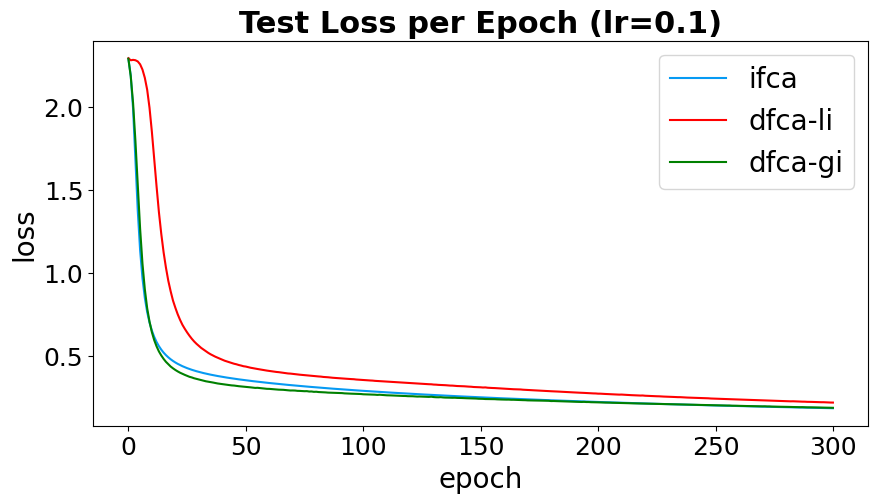

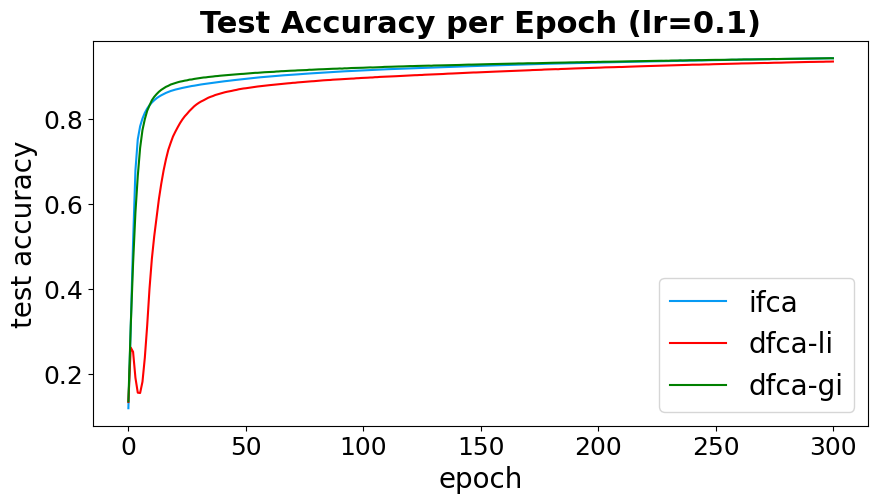

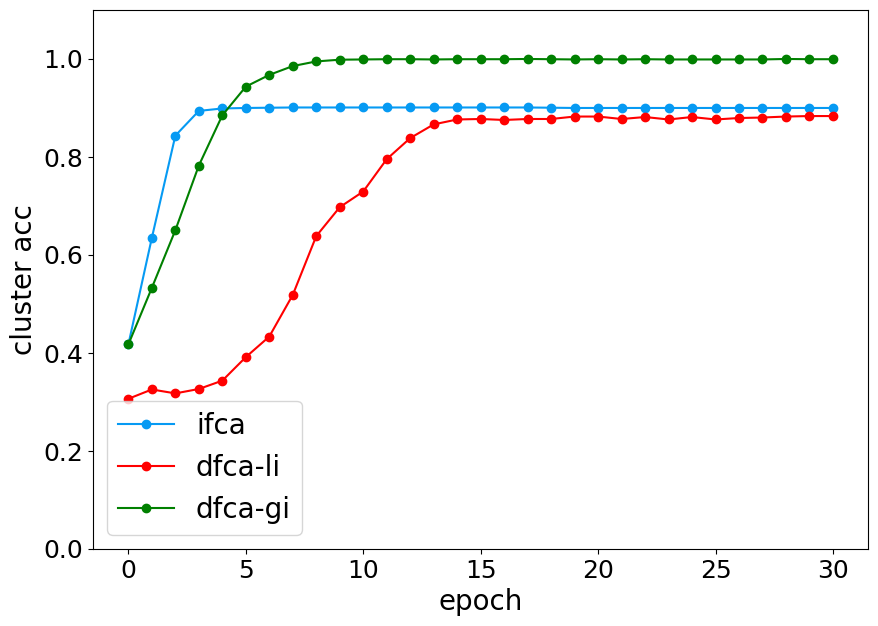

In [11]:

r_ifca = {}
r_dfca_gi = {}
r_dfca_li = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

r_dfca_li['test_loss'] = []
r_dfca_li['test_acc'] = []
r_dfca_li['cl_acc'] = []
r_dfca_li['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_li['test_loss'].append(dfca_li[i][0])
    r_dfca_li['test_acc'].append(dfca_li[i][1])
    r_dfca_li['cl_acc'].append(dfca_li[i][2])
    r_dfca_li['train_loss'].append(dfca_li[i][3])



os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_li['test_loss'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_li['test_acc'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='xkcd:azure', marker='o')
    plt.plot(r_dfca_li['cl_acc'][l][:31], label='dfca-li', color='red', marker='o')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', 'cluster_acc.png'))